<a href="https://colab.research.google.com/github/unnatirawat19/Stock_Price_Prediction/blob/main/stock.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import math#use for mathematical operations
import numpy as np#use for operation in array
import pandas as pd#use to manipulated numerical data and time series
from sklearn.preprocessing import MinMaxScaler#use to scale values to a specified range
from keras.models import Sequential#sequentially arrange stack of layers
from keras.layers import Dense, LSTM#use for neural networks
import matplotlib.pyplot as plt#used for plotting graphs

In [ ]:
df=pd.read_csv('AAPL.csv')
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2012-01-24,15.182143,15.182143,14.983929,15.014643,12.798751,547638000
1,2012-01-25,16.230000,16.230356,15.847500,15.952143,13.597889,958314000
2,2012-01-26,16.012857,16.028214,15.826429,15.879643,13.536093,323985200
3,2012-01-27,15.869286,16.017143,15.848929,15.974286,13.616767,299709200
4,2012-01-30,15.918214,16.210714,15.906786,16.178928,13.791207,379341200
...,...,...,...,...,...,...,...
2762,2023-01-13,132.029999,134.919998,131.660004,134.759995,134.759995,57758000
2763,2023-01-17,134.830002,137.289993,134.130005,135.940002,135.940002,63646600
2764,2023-01-18,136.820007,138.610001,135.029999,135.210007,135.210007,69672800
2765,2023-01-19,134.080002,136.250000,133.770004,135.270004,135.270004,58280400


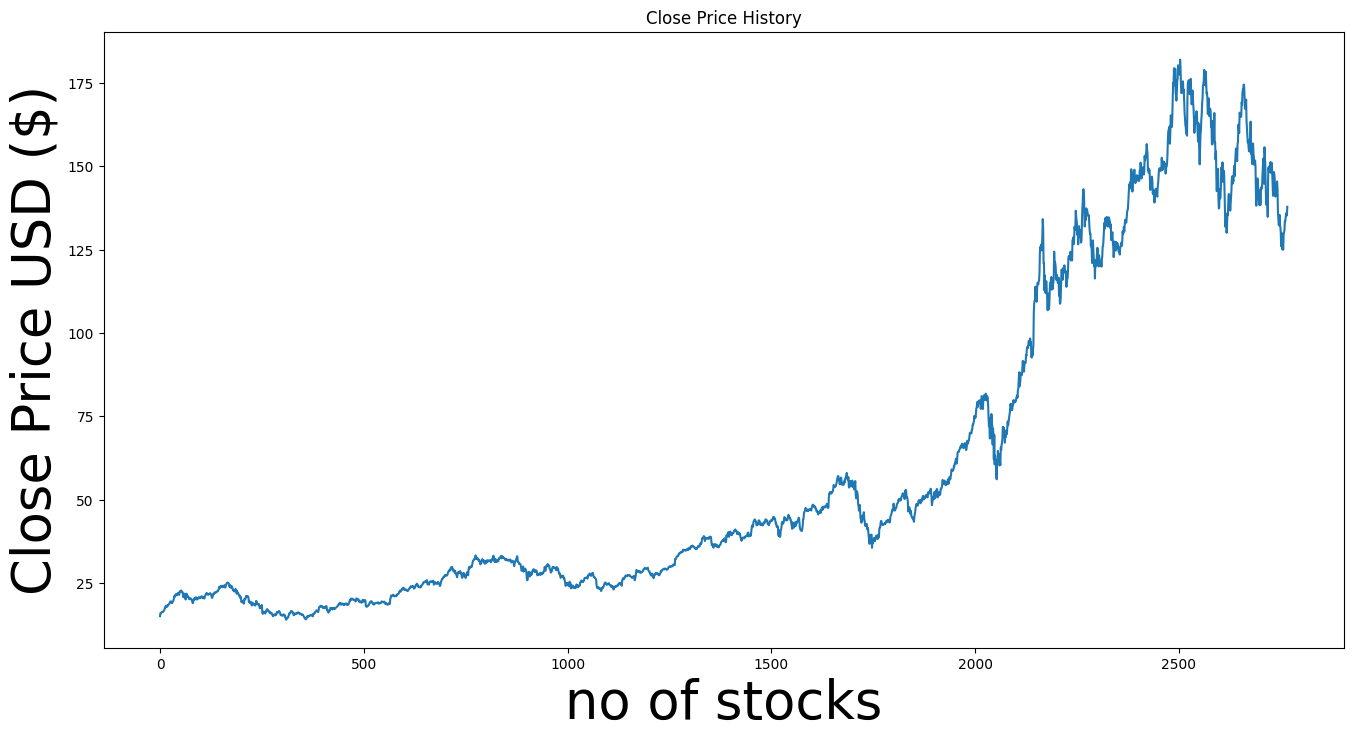

In [ ]:
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('no of stocks',fontsize=38)
plt.ylabel('Close Price USD ($)',fontsize=38)
plt.show()

In [ ]:
#creating a new dataframe with only the close column
data=df.filter(['Close'])
#converting the dataframe to a numpy array
dataset=data.values
#getting the number of rows to train the model on
training_data_len=math.ceil(len(dataset)*.8)
training_data_len


2214

In [ ]:
#scaling the data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data=scaler.fit_transform(dataset)
scaled_data

array([[0.00634968],
       [0.01192796],
       [0.01149657],
       ...,
       [0.72153223],
       [0.72188922],
       [0.73735961]])

In [ ]:
#create the training data set
#create teh scaled training data set
train_data=scaled_data[0:training_data_len,:]
#split the data into x_train and y_train data sets
x_train =[]
y_train=[]

for i in range(60,len(train_data)):
  x_train.append(train_data[i-60:i,0])
  y_train.append(train_data[i,0])
  if i<=60:
    print(x_train)
    print(y_train)
    print()

[array([0.00634968, 0.01192796, 0.01149657, 0.01205972, 0.01327737,
       0.01401476, 0.01395314, 0.01372576, 0.01469479, 0.01560643,
       0.01663922, 0.01830739, 0.02181161, 0.02186474, 0.02381555,
       0.02527334, 0.0227679 , 0.02373267, 0.02371355, 0.02641875,
       0.02603411, 0.026746  , 0.02802528, 0.02873718, 0.03078787,
       0.03228178, 0.03271316, 0.03286405, 0.03030974, 0.02969346,
       0.02978484, 0.03218616, 0.03286193, 0.03431335, 0.03773469,
       0.04229932, 0.04144504, 0.04144717, 0.04474738, 0.04578017,
       0.04504489, 0.04437338, 0.04367423, 0.04599691, 0.04759072,
       0.04825799, 0.04660894, 0.044418  , 0.04847262, 0.0507443 ,
       0.04967964, 0.05167084, 0.05221272, 0.0505573 , 0.05008129,
       0.04935239, 0.04562503, 0.04029114, 0.04657494, 0.04628593])]
[0.04184455312293203]



In [ ]:
#converting the x_train and y_train to numpy arrays
x_train,y_train=np.array(x_train),np.array(y_train)


In [ ]:
#reshape the data
x_train=np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))
x_train.shape

(2154, 60, 1)

In [ ]:
x_train

array([[[0.00634968],
        [0.01192796],
        [0.01149657],
        ...,
        [0.04029114],
        [0.04657494],
        [0.04628593]],

       [[0.01192796],
        [0.01149657],
        [0.01205972],
        ...,
        [0.04657494],
        [0.04628593],
        [0.04184455]],

       [[0.01149657],
        [0.01205972],
        [0.01327737],
        ...,
        [0.04628593],
        [0.04184455],
        [0.03877172]],

       ...,

       [[0.56780961],
        [0.58943848],
        [0.60133882],
        ...,
        [0.56474528],
        [0.56420974],
        [0.57414655]],

       [[0.58943848],
        [0.60133882],
        [0.60072892],
        ...,
        [0.56420974],
        [0.57414655],
        [0.60098178]],

       [[0.60133882],
        [0.60072892],
        [0.59894385],
        ...,
        [0.57414655],
        [0.60098178],
        [0.62525847]]])

In [ ]:
#building the LSTM model
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(x_train.shape[1],1)))
model.add(LSTM(50,return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))


In [ ]:
#building the LSTM model
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(x_train.shape[1],1)))
model.add(LSTM(80,return_sequences=False))
model.add(Dense(12))
model.add(Dense(1))


In [ ]:
#building the LSTM model
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(x_train.shape[1],1)))
model.add(LSTM(100,return_sequences=False))
model.add(Dense(12))
model.add(Dense(1))


In [ ]:
#building the LSTM mode
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(x_train.shape[1],1)))
model.add(LSTM(80,return_sequences=False))
model.add(Dense(12))
model.add(Dense(4))
model.add(Dense(1))



In [ ]:
#building the LSTM model 4
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(x_train.shape[1],1)))
model.add(LSTM(50,return_sequences=False))
model.add(Dense(12))
model.add(Dense(2))
model.add(Dense(1))


In [ ]:
model.compile(optimizer='adam',loss='mean_squared_error')


In [ ]:
#training the model
model.fit(x_train,y_train,batch_size=1,epochs=1)

2154/2154 [==============================] - 21s 8ms/step - loss: 6.1169e-04


In [ ]:
#creating the testing dataset
#creating a new array containing scaled values from index 2155 to 2768
test_data=scaled_data[training_data_len-60:,:]
#creating the dataset x_test and y_test
x_test=[]
y_test=dataset[training_data_len:,:]
for i in range(60,len(test_data)):
  x_test.append(test_data[i-60:i,0])

In [ ]:
#converting the data to a numpy array
x_test=np.array(x_test)


In [ ]:
#reshaping the data
x_test=np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))


In [ ]:
#getting the model predicted price values
predictions=model.predict(x_test)
predictions=scaler.inverse_transform(predictions)


18/18 [==============================] - 1s 5ms/step


In [ ]:
#getting the root mean squared error(RMSE)
rmse=np.sqrt(np.mean(predictions-y_test)**2)
rmse

1.087388380962682

<ipython-input-64-ab72cf505bff>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions']=predictions


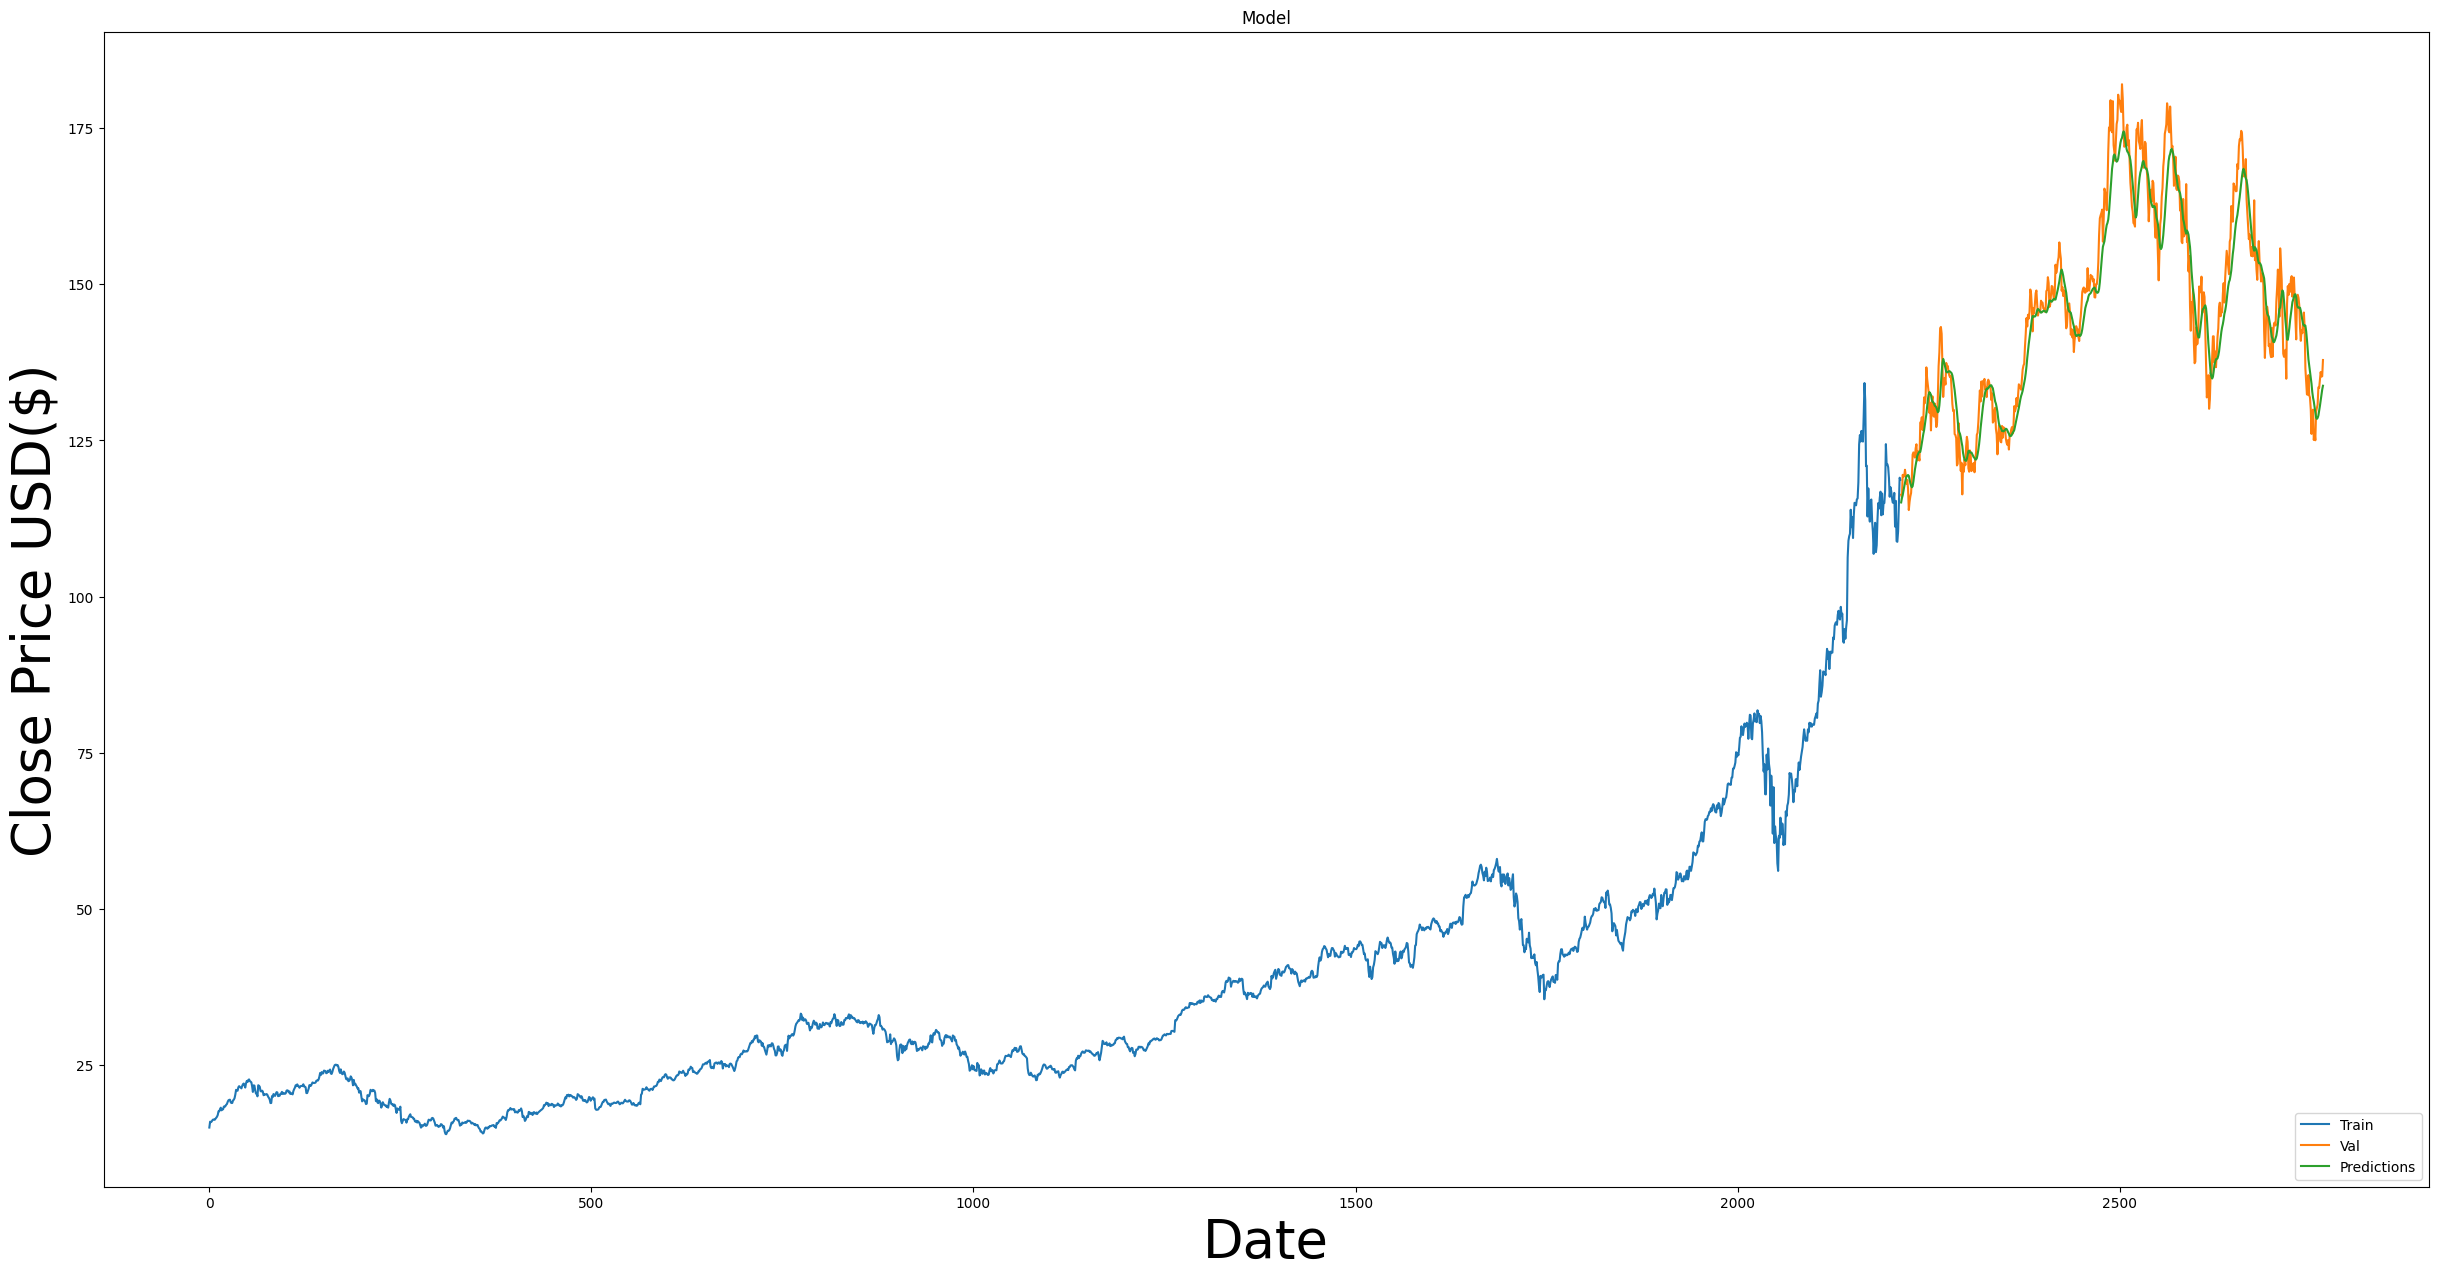

In [ ]:
#plotting the data
train =data[:training_data_len]
valid=data[training_data_len:]
valid['Predictions']=predictions
#visualizing the data
plt.figure(figsize=(30,15))
plt.title('Model')
plt.xlabel('Date',fontsize=38)
plt.ylabel('Close Price USD($)',fontsize=38)
plt.plot(train['Close'])
plt.plot(valid[['Close','Predictions']])
plt.legend(['Train','Val','Predictions'],loc='lower right')
plt.show()

In [ ]:
#showing the valid and predicted prices
valid

,Close,Predictions
2214,116.320000,115.911430
2215,115.970001,116.792976
2216,119.489998,117.251755
2217,119.209999,117.999260
2218,119.260002,118.679771
...,...,...
2762,134.759995,131.186234
2763,135.940002,132.216934
2764,135.210007,133.252686
2765,135.270004,133.986221
